In [1]:
# Locally Linear Embedding (LLE) is a non-linear dimensionality reduction technique. It works by assuming that a high-dimensional dataset actually lies on a smoother, lower-dimensional manifold (like a rolled-up sheet of paper in 3D space).

# LLE's goal is to "unroll" this manifold while preserving the local relationships between data points. It achieves this in two steps:

# For each data point, it finds its closest neighbors and calculates the weights needed to best reconstruct that point as a linear combination of its neighbors.

# It then finds a low-dimensional set of coordinates for all points that best preserves these same reconstruction weights.

# In essence, it flattens the data by ensuring that what was a "neighbor" in high-dimensional space remains a "neighbor" in the low-dimensional output.

# What It's Best Used For
# LLE is most effective for specific tasks:

# Visualization: Its primary use is to visualize complex, non-linear data structures like the Swiss Roll, S-curve, or other "tangled" datasets in 2D or 3D. 🗺️

# Feature Extraction on Manifolds: It can be used as a preprocessing step before applying other machine learning algorithms (like clustering or classification) when you have strong reason to believe your data follows a manifold structure.

# It excels at discovering the underlying, intrinsic dimensions of data that is twisted or curled in on itself.

# Constraints on the Data
# LLE's effectiveness depends heavily on the data meeting certain criteria:

# Requires a Well-Sampled Manifold: The data must be dense enough everywhere. If there are large holes or sparse regions, LLE may fail to connect the neighborhoods correctly and can "tear" the manifold apart.

# Sensitive to Hyperparameters: The result is highly dependent on the choice of n_neighbors. As we saw, a poor choice can lead to distorted or disconnected results.

# Computational Cost: LLE can be slow and memory-intensive for very large datasets because it needs to compute a nearest-neighbors graph for all points.

# Struggles with Varying Density: It performs best when the data density across the manifold is relatively uniform.

# Not for Global Structure: It does not explicitly try to preserve the global structure of the data, which is why the "unrolled" Swiss Roll often looks distorted.

Searching for best n_neighbors...
Successfully tested n_neighbors=range(5, 26)
Successfully tested n_neighbors=range(5, 26)
Successfully tested n_neighbors=range(5, 26)
Successfully tested n_neighbors=range(5, 26)
Successfully tested n_neighbors=range(5, 26)
Successfully tested n_neighbors=range(5, 26)
Successfully tested n_neighbors=range(5, 26)
Successfully tested n_neighbors=range(5, 26)
Successfully tested n_neighbors=range(5, 26)
Successfully tested n_neighbors=range(5, 26)
Successfully tested n_neighbors=range(5, 26)
Successfully tested n_neighbors=range(5, 26)
Successfully tested n_neighbors=range(5, 26)
Successfully tested n_neighbors=range(5, 26)
Successfully tested n_neighbors=range(5, 26)
Successfully tested n_neighbors=range(5, 26)
Successfully tested n_neighbors=range(5, 26)
Successfully tested n_neighbors=range(5, 26)
Successfully tested n_neighbors=range(5, 26)
Successfully tested n_neighbors=range(5, 26)
Successfully tested n_neighbors=range(5, 26)
Search complete. Best

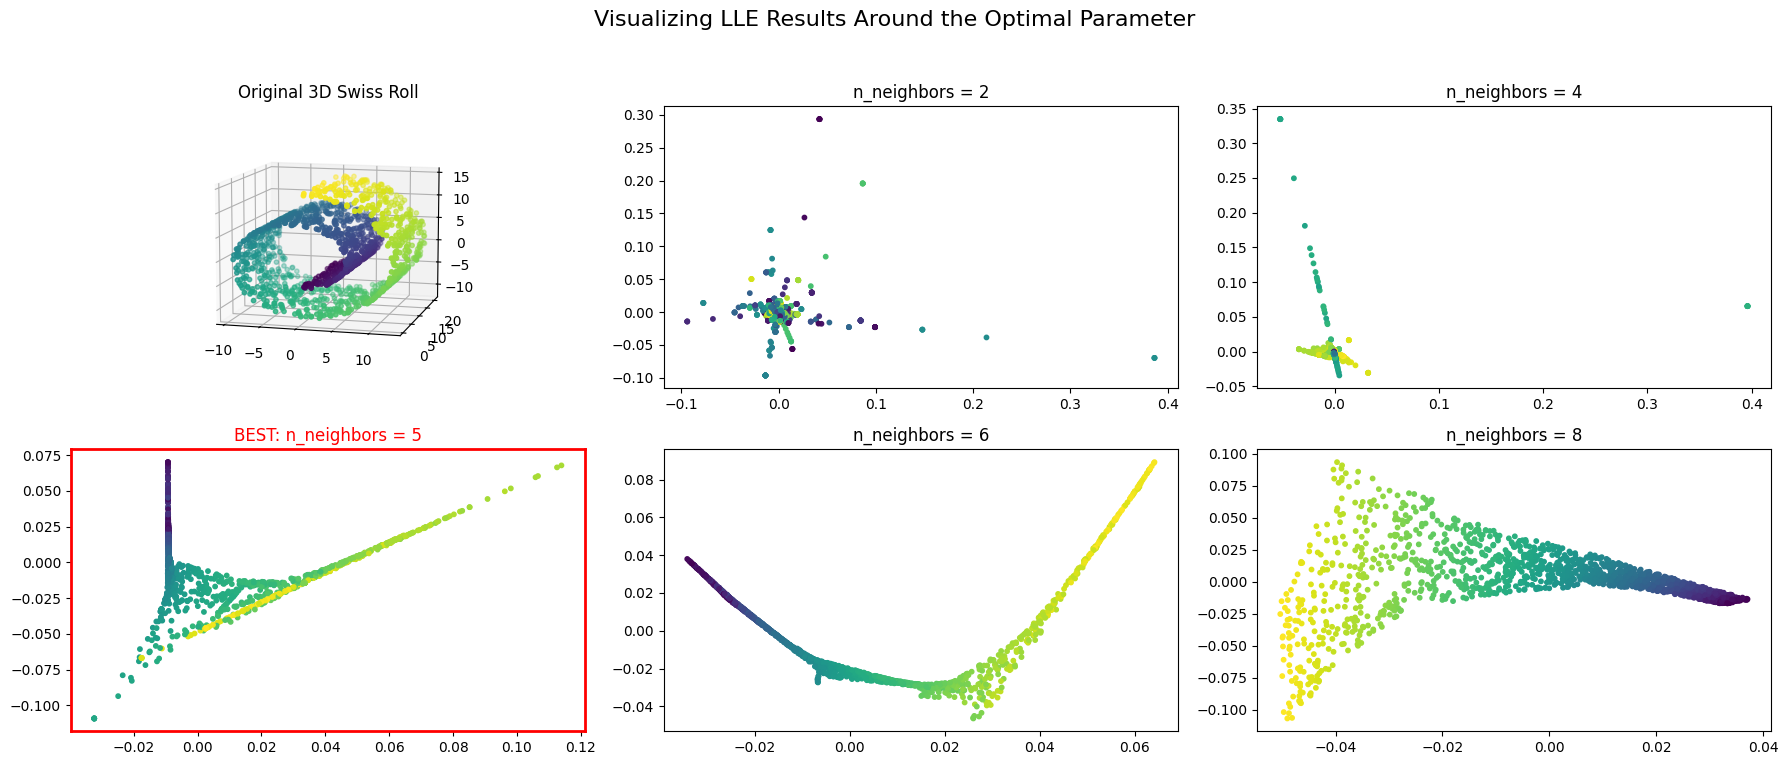


Creating final DataFrame using the best embedding (n_neighbors=5)...
Head of the final DataFrame:
   lle_component_1  lle_component_2  color_value
0        -0.021801        -0.001204     8.242346
1         0.008986        -0.026711    13.672660
2         0.010634        -0.021022    11.611269
3        -0.010270        -0.020752    10.354612
4        -0.022134         0.022568     6.182830


In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

# --- Step 1: Load the Swiss Roll dataset ---
X, color = make_swiss_roll(n_samples=1500, random_state=42)

# --- Step 2: Automatically find the best n_neighbors ---
print("Searching for best n_neighbors...")
n_neighbors = range(5, 26) 
reconstruction_errors = []

for k in n_neighbors:
    lle_search = LocallyLinearEmbedding(
        n_neighbors=k,
        n_components=2,
        random_state=42,
        n_jobs=-1,
        eigen_solver='dense'
    )
    lle_search.fit(X)
    reconstruction_errors.append(lle_search.reconstruction_error_)
    print(f"Successfully tested n_neighbors={n_neighbors}")

# Find the best parameter
best_index = np.argmin(reconstruction_errors)
best_n_neighbors = n_neighbors[best_index]
print(f"Search complete. Best n_neighbors found: {best_n_neighbors}")

# --- Step 3: Visualize results centered around the best parameter ---
neighbors_to_visualize = [
    best_n_neighbors - 3,
    best_n_neighbors - 1,
    best_n_neighbors,
    best_n_neighbors + 1,
    best_n_neighbors + 3
]
# Ensure all neighbors are valid (>= 2)
neighbors_to_visualize = [k for k in neighbors_to_visualize if k > 1]

fig = plt.figure(figsize=(18, 8))
# Plot the original 3D data
ax_3d = fig.add_subplot(2, 3, 1, projection='3d')
ax_3d.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.viridis, s=10)
ax_3d.set_title("Original 3D Swiss Roll")
ax_3d.view_init(elev=10, azim=-75)

# Plot the 2D embeddings
for i, k in enumerate(neighbors_to_visualize):
    lle_viz = LocallyLinearEmbedding(
        n_neighbors=k,
        n_components=2,
        random_state=42,
        n_jobs=-1,
        eigen_solver='dense'
    )
    X_reduced = lle_viz.fit_transform(X)
    
    ax = fig.add_subplot(2, 3, i + 2) # Start from the second subplot
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=color, cmap=plt.cm.viridis, s=10)
    # Highlight the best one with a red border
    if k == best_n_neighbors:
        ax.spines['bottom'].set_color('red')
        ax.spines['top'].set_color('red')
        ax.spines['right'].set_color('red')
        ax.spines['left'].set_color('red')
        ax.spines['bottom'].set_linewidth(2)
        ax.spines['top'].set_linewidth(2)
        ax.spines['right'].set_linewidth(2)
        ax.spines['left'].set_linewidth(2)
        ax.set_title(f"BEST: n_neighbors = {k}", color='red')
    else:
        ax.set_title(f"n_neighbors = {k}")

plt.suptitle("Visualizing LLE Results Around the Optimal Parameter", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- Step 4: Create and display the final DataFrame with the best result ---
print(f"\nCreating final DataFrame using the best embedding (n_neighbors={best_n_neighbors})...")
final_lle = LocallyLinearEmbedding(
    n_neighbors=best_n_neighbors,
    n_components=2,
    random_state=42,
    n_jobs=-1
)
final_embedding = final_lle.fit_transform(X)

swiss_roll_df = pd.DataFrame(final_embedding, columns=['lle_component_1', 'lle_component_2'])
swiss_roll_df['color_value'] = color

print("Head of the final DataFrame:")
print(swiss_roll_df.head())